In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input

In [2]:
# Step 2: Load the OCR letter recognition dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
column_names = ['letter'] + [f'pixel{i}' for i in range(1, 17)]
data = pd.read_csv(url, names=column_names)

In [3]:
# Step 3: Preprocess the data
X = data.drop('letter', axis=1).values
y = data['letter'].values

In [4]:
# Step 4: Convert labels to integers (A = 0, B = 1, ..., Z = 25)
y = pd.Categorical(y).codes

In [5]:
# Step 5: Normalize the pixel values (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Step 6: One-hot encode the labels for multiclass classification
y_onehot = to_categorical(y, num_classes=26)

In [7]:
# Step 7: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_onehot, test_size=0.2, random_state=42)

In [8]:
# Step 8: Build the Deep Neural Network model

# Build the Deep Neural Network model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(26, activation='softmax')  # 26 classes for letters A-Z
])


In [9]:
# Step 9: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Step 10: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1987 - loss: 2.9146 - val_accuracy: 0.5822 - val_loss: 1.6314
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5958 - loss: 1.4756 - val_accuracy: 0.7228 - val_loss: 1.0357
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7047 - loss: 1.0170 - val_accuracy: 0.7513 - val_loss: 0.8436
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7428 - loss: 0.8583 - val_accuracy: 0.7925 - val_loss: 0.7355
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7691 - loss: 0.7620 - val_accuracy: 0.8094 - val_loss: 0.6680
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7889 - loss: 0.7030 - val_accuracy: 0.8297 - val_loss: 0.5971
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7941 - loss: 0.6731 - val_accuracy: 0.8444 - val_loss: 0.5475
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8104 - loss: 0.6116 - val_accuracy: 0.

In [11]:
# Step 11: Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.8755 - loss: 0.4298
Test Accuracy: 0.8758


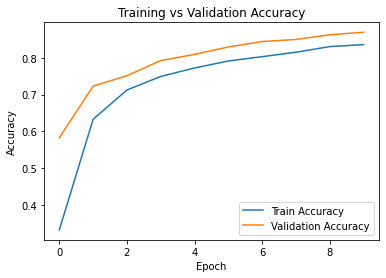

In [12]:
# Step 12: Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

In [13]:
# Step 13: Predict on a few test samples
predictions = model.predict(X_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [14]:
# Step 14: Display predictions along with actual labels
for i in range(5):
    print(f"Predicted: {chr(np.argmax(predictions[i]) + 65)}, Actual: {chr(np.argmax(y_test[i]) + 65)}")

Predicted: Z, Actual: T
Predicted: T, Actual: L
Predicted: A, Actual: A
Predicted: E, Actual: E
Predicted: Q, Actual: Q
